In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
wn = pd.read_csv("../DSI-SF-Cojasami-Kaggle/Datasets/west_nile/input/train.csv")
wr = pd.read_csv("../DSI-SF-Cojasami-Kaggle/Datasets/west_nile/input/weather.csv")
sp = pd.read_csv("../DSI-SF-Cojasami-Kaggle/Datasets/west_nile/input/spray.csv")

In [3]:
wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [19]:
wn.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [4]:
wn.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [5]:
wr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [6]:
wr.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [7]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [8]:
location = pd.DataFrame(wn[['Date', 'Address', 'Block', 'Street', 'Latitude',
                            'Longitude','WnvPresent']])

In [9]:
location.head(2)

,Date,Address,Block,Street,Latitude,Longitude,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,41.95469,-87.800991,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,41.95469,-87.800991,0


In [10]:
water = pd.DataFrame(wr[['Date', 'DewPoint', 'WetBulb', 'PrecipTotal', 'SeaLevel']]) 

In [11]:
wet_area = location.merge(water, on='Date')

In [12]:
wet_area.shape

(21012, 11)

In [21]:
wet_area.PrecipTotal.value_counts()

0.00    11727
  T      1987
0.23      574
0.06      561
0.01      433
0.02      317
0.36      305
0.16      300
0.83      276
0.84      231
0.09      206
0.03      204
0.92      191
0.24      186
0.20      186
0.12      186
1.31      184
0.58      182
0.39      146
0.13      146
0.17      144
0.08      143
0.37      139
0.88      139
0.70      138
0.33      131
1.55      129
0.59      127
0.50      119
0.79      116
0.11      116
3.97       93
0.87       93
0.14       93
0.19       93
0.04       83
0.27       83
0.89       65
0.44       62
0.52       62
0.42       60
0.95       54
1.19       54
0.18       50
M          46
0.05       26
0.46       26
Name: PrecipTotal, dtype: int64

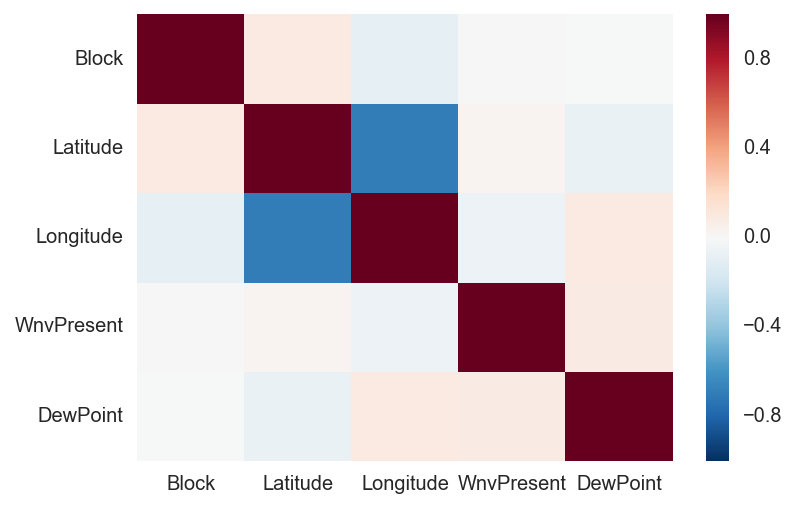

In [14]:
sns.heatmap(wet_area.corr())

In [15]:
wet_area.groupby(['Block','Street'])['PrecipTotal'].sum()

Block  Street                        
10      E 67TH ST                        0.000.000.000.000.170.040.000.000.000.000.000....
        N CENTRAL PARK DR                0.00M0.00M0.000.000.000.000.000.000.000.000.00...
        S CALIFORNIA AVE                 0.16  T0.000.000.000.000.000.000.000.000.000.0...
        S COTTAGE GROVE                  0.000.000.000.000.000.000.000.000.000.000.000....
        S STONY ISLAND AVE               1.550.921.550.921.550.921.550.921.550.920.160....
        S VINCENNES                      0.420.270.00M0.000.000.000.000.000.000.000.000...
        W 95TH ST                        0.16  T0.00M0.00M0.000.000.000.000.000.000.000...
        W OHARE                          0.000.000.000.000.000.000.000.000.090.060.090....
        W OHARE AIRPORT                  0.000.000.000.000.000.000.000.000.000.000.000....
11      S ARTESIAN AVE                   0.00M0.000.000.000.000.000.000.000.000.000.000...
        S ASHLAND AVE                    0.420.270.4

In [16]:
wet_area.groupby(['Block','Street']).mean().sort(['DewPoint'], ascending=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,,Latitude,Longitude,WnvPresent,DewPoint
Block,Street,,,,
34,W 77TH ST,41.753391,-87.707394,0.000000,49.285714
11,S WALLACE ST,41.753411,-87.639817,0.000000,56.000000
29,W 85TH ST,41.738903,-87.695443,0.000000,56.166667
71,N HARLEM AVE,42.009876,-87.807277,0.140000,57.230000
49,W SUNNYSIDE AVE,41.962728,-87.748367,0.000000,57.666667
65,E 91ST PL,41.728495,-87.600963,0.051282,57.717949
61,W FULLERTON AVE,41.923738,-87.785288,0.096154,57.860577
39,N SPRINGFIELD AVE,41.951866,-87.725057,0.096774,57.951613
62,N MCCLELLAN AVE,41.994679,-87.770899,0.030303,57.954545


In [17]:
wet_area.groupby(['Street']).mean().sort(['DewPoint'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Block,Latitude,Longitude,WnvPresent,DewPoint
Street,,,,,
S HAMLIN AVE,21.000000,41.852652,-87.719887,0.000000,69.000000
S LONGWOOD DR,96.000000,41.719140,-87.669539,0.000000,66.700000
W 37TH PL.,81.000000,41.825902,-87.667827,0.000000,65.714286
S AVENUE L,11.000000,41.702724,-87.536497,0.072289,65.602410
E 138TH ST,82.000000,41.644612,-87.604498,0.058824,64.529412
W 31ST ST,42.000000,41.837085,-87.729384,0.041667,64.208333
N STAVE ST,21.000000,41.919343,-87.694259,0.000000,64.147059
S CORNELL AVE,47.000000,41.799282,-87.585487,0.000000,64.000000
S WESTERN AVE,27.000000,41.843811,-87.686763,0.000000,63.764706


In [18]:
wet_area.groupby(['Block']).mean().sort(['DewPoint'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Latitude,Longitude,WnvPresent,DewPoint
Block,,,,
80,41.747850,-87.702716,0.000000,64.000000
47,41.799282,-87.585487,0.000000,64.000000
27,41.843811,-87.686763,0.000000,63.764706
96,41.719072,-87.674193,0.000000,63.661290
81,41.767093,-87.615804,0.055556,63.569444
98,41.717753,-87.531657,0.000000,63.543478
21,41.917506,-87.709049,0.061224,62.775510
55,41.794781,-87.615989,0.000000,62.400000
18,41.987386,-87.675312,0.000000,62.360465
